In [ ]:
import sys
import math
import random
import numpy as np
from matplotlib import cm
from numpy import exp,arange
import matplotlib.pyplot as plt
from numpy.random import randint, rand
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import GridSearchCV, train_test_split
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [ ]:
def humps(x):
    return 1/((x-0.3)**2+0.01) + 1/((x-0.9)**2+0.04) - 6

In [ ]:
x_vals = np.arange(-5,5,0.02)
y_vals = humps(x_vals)
y_max = y_vals.max()
y_vals /= y_max

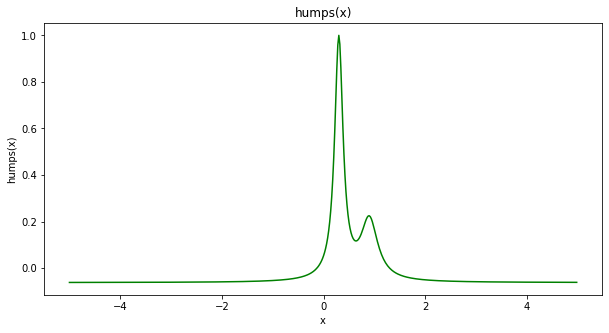

In [ ]:
# x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10,5))    
plt.plot(x_vals, y_vals, color='green')
# plt.plot(indecis, time1, linestyle='-', marker='o', color='green', label=label)
plt.xlabel('x')
plt.ylabel('humps(x)')
plt.title("humps(x)")
# tuple1 = tuple(str(i) for i in indecis)
# plt.xticks(indecis, tuple1)
plt.show()

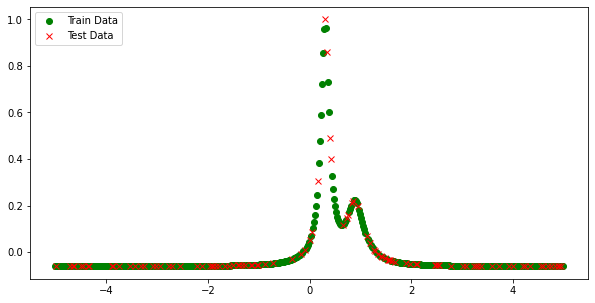

In [ ]:
# https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
# plt.figure()
plt.figure(figsize=(10,5))  
plt.plot(x_train, y_train, 'o', color='green', label='Train Data')
plt.plot(x_test, y_test, 'x', color='red', label='Test Data')
plt.legend(loc='upper left')
plt.show()

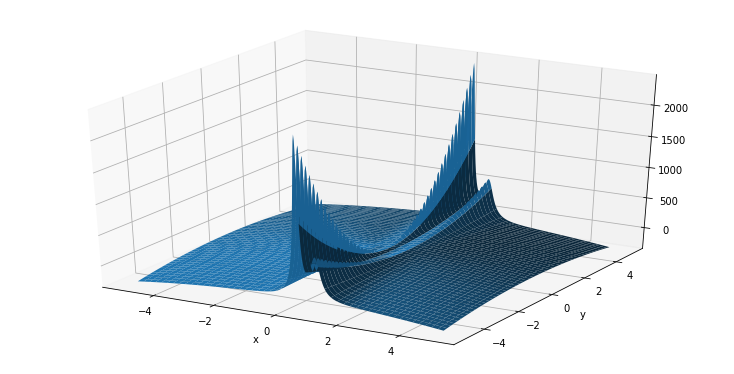

In [ ]:
def z_func(x, y):
    return  (x**2 + y**2)*humps(x)#*(1/((x-0.3)**2+0.01) + 1/((x-0.9)**2+0.04) - 6)

x = np.arange(-5.0, 5.0, 0.02)
y = np.arange(-5.0, 5.0, 0.02)

X,Y = np.meshgrid(x, y) # grid of point


Z = z_func(X, Y) # evaluation of the function on the grid

# plt.figure(figsize=(10,5))  
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.xlabel('x')
# plt.title('$\frac{{\Gamma_M}}{{\Gamma_D}}$ = 10')
plt.ylabel('y')
plt.show()

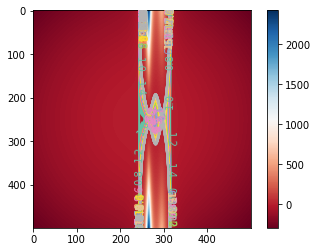

In [ ]:
im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(0,20,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
# title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

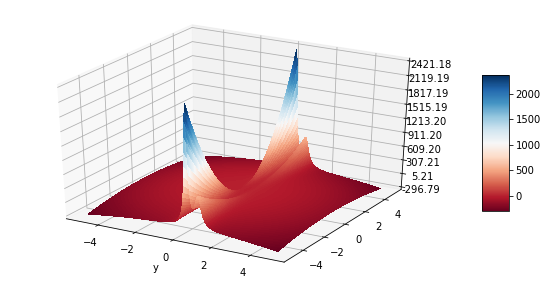

In [ ]:
# fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('x')
plt.xlabel('y')

plt.show()

In [ ]:
x = np.arange(-5, 5, 0.02)
xy = [(j,k) for j in x for k in x]
out = [z_func(p[0],p[1]) for p in xy]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

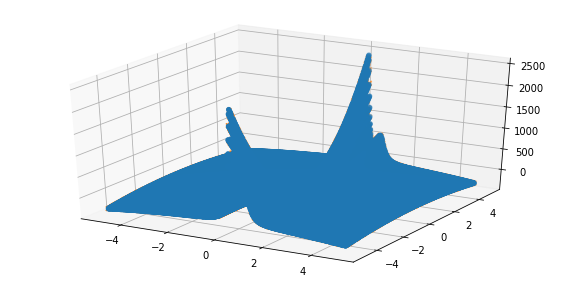

In [ ]:
# fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])

ax.scatter(x1_vals, x2_vals, y_test, marker='x')

plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

def modelMLPRegressor(layers=[30], max_iter = 100):
    # set up network with parameters
    mlp = MLPRegressor(
        hidden_layer_sizes=layers,
        max_iter=max_iter,
        tol=0,
    )
    return mlp

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# First State

In [ ]:
layers=[30, 20]
max_iter = 100
mlp1 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp1.fit(x_train,y_train)

# test
predictions = mlp1.predict(x_test)

mse1 = mean_squared_error(y_test, predictions)
print(f"mse1={mse1}")

print(f"mlp1.score={mlp1.score(x_test, y_test)}")
print(f"mlp1 Loss={mlp1.loss_}")
print(f"mlp1 Best Loss is ={mlp1.best_loss_}")
plt.plot(mlp1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Second State

In [ ]:
layers=[30, 20, 10]
max_iter = 100
mlp2 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp2.fit(x_train,y_train)

# test
predictions = mlp2.predict(x_test)

mse2 = mean_squared_error(y_test, predictions)
print(f"mse2={mse2}")

print(f"mlp2.score={mlp2.score(x_test, y_test)}")
print(f"mlp2 Loss={mlp2.loss_}")
print(f"mlp2 Best Loss is ={mlp2.best_loss_}")
plt.plot(mlp2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Third State

In [ ]:
layers=[30]
max_iter = 100
mlp3 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp3.fit(x_train,y_train)

# test
predictions = mlp3.predict(x_test)

mse3 = mean_squared_error(y_test, predictions)
print(f"mse3={mse3}")

print(f"mlp3.score={mlp3.score(x_test, y_test)}")
print(f"mlp3 Loss={mlp3.loss_}")
print(f"mlp3 Best Loss is ={mlp3.best_loss_}")
plt.plot(mlp3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Forth State

In [ ]:
layers=[30]
max_iter = 1000
mlp4 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp4.fit(x_train,y_train)

# test
predictions = mlp4.predict(x_test)

mse4 = mean_squared_error(y_test, predictions)
print(f"mse4={mse4}")

print(f"mlp4.score={mlp4.score(x_test, y_test)}")
print(f"mlp4 Loss={mlp4.loss_}")
print(f"mlp4 Best Loss is ={mlp4.best_loss_}")
plt.plot(mlp4.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Fifth State

In [ ]:
layers=[60]
max_iter = 100
mlp5 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp5.fit(x_train,y_train)

# test
predictions = mlp5.predict(x_test)

mse5 = mean_squared_error(y_test, predictions)
print(f"mse5={mse5}")

print(f"mlp5.score={mlp5.score(x_test, y_test)}")
print(f"mlp5 Loss={mlp5.loss_}")
print(f"mlp5 Best Loss is ={mlp5.best_loss_}")
plt.plot(mlp5.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
def MLPModel(hidden_layer_sizes, iter_number, x_train, y_train, x_test, y_test):

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes)

    losses = []
    test_performance = []

    for epoch in range(iter_number):
        # print(f"epoch={epoch}")
        # Make 100 passes over the batches

        # for batch in range(500, 7501, 500):
            # Perform partial fits on batches of 500 examples

            # Simulate batches, these could also be loaded from `.npy`
            # X_train_batch = X_train[batch-500:batch]
            # y_train_batch = y_train[batch-500:batch]

        # regr.partial_fit(x_train, y_train)
        mlp.partial_fit(x_train, y_train)

        losses.append(mlp.loss_)
        test_performance.append(mlp.score(x_test, y_test))

    predictions = mlp.predict(x_test)
    mse = mean_squared_error(y_test, predictions)

    return losses, test_performance, mse, mlp.loss_, mlp.best_loss_, mlp.loss_curve_

# First State

for model 1: mlp.score=0.9975887332132137, mse=67.89323551761001, loss_=34.60076629037542, best_loss=34.60076629037542


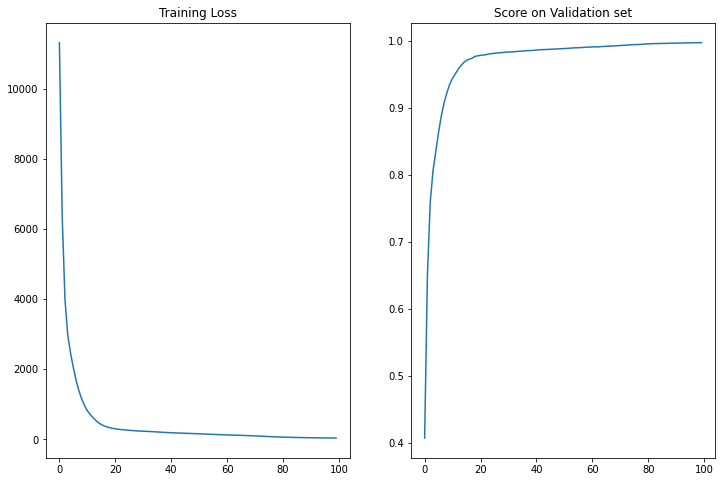

<Figure size 720x360 with 0 Axes>

In [ ]:
iter_number = 100
hidden_layer_sizes = [30, 20]
losses_1, test_performance_1, mse_1, loss_1, best_loss_1, loss_curve_1 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 1: mlp.score={test_performance_1[-1]}, mse={mse_1}, loss_={loss_1}, best_loss={best_loss_1}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_1)), losses_1)
ax2.plot(range(len(test_performance_1)), test_performance_1)
plt.show()

# Second State

for model 2: mlp.score=0.9989514772599007, mse=29.522905440921317, loss_=14.410988184814178, best_loss=14.1314172085004


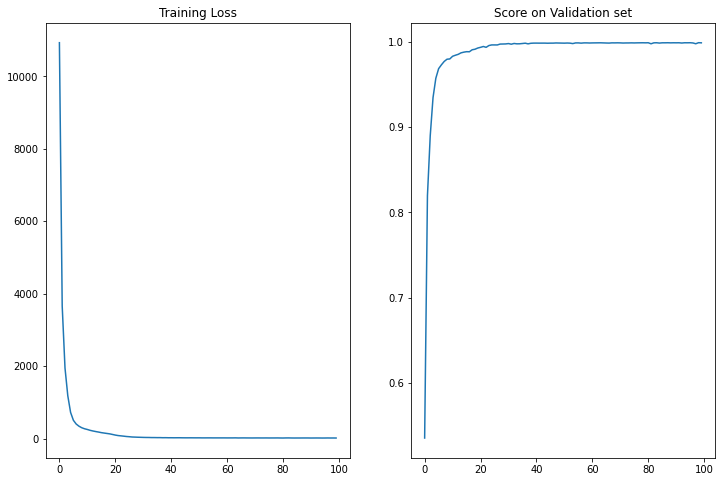

In [ ]:
iter_number = 100
hidden_layer_sizes = [30, 20, 10]
losses_2, test_performance_2, mse_2, loss_2, best_loss_2, loss_curve_2 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 2: mlp.score={test_performance_2[-1]}, mse={mse_2}, loss_={loss_2}, best_loss={best_loss_2}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_2)), losses_2)
ax2.plot(range(len(test_performance_2)), test_performance_2)
plt.show()

# Third State

for model 3: mlp.score=0.3586652667574358, mse=18057.84840079562, loss_=9006.954856816667, best_loss=9006.954856816667


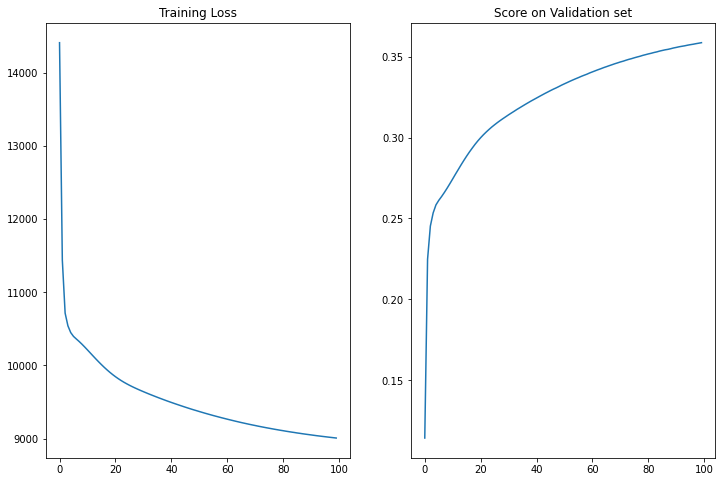

In [ ]:
iter_number = 100
hidden_layer_sizes = [30]
losses_3, test_performance_3, mse_3, loss_3, best_loss_3, loss_curve_3 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 3: mlp.score={test_performance_3[-1]}, mse={mse_3}, loss_={loss_3}, best_loss={best_loss_3}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_3)), losses_3)
ax2.plot(range(len(test_performance_3)), test_performance_3)
plt.show()

# Forth State

for model 4: mlp.score=0.41241809598367785, mse=16544.347897908912, loss_=8229.384978998878, best_loss=8228.637643164404


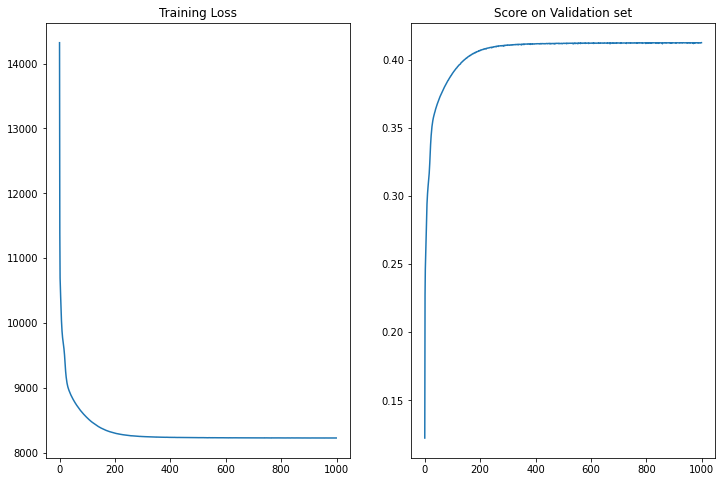

In [ ]:
iter_number = 1000
hidden_layer_sizes = [30]
losses_4, test_performance_4, mse_4, loss_4, best_loss_4, loss_curve_4 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 4: mlp.score={test_performance_4[-1]}, mse={mse_4}, loss_={loss_4}, best_loss={best_loss_4}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_4)), losses_4)
ax2.plot(range(len(test_performance_4)), test_performance_4)
plt.show()

# Fifth State

for model 5: mlp.score=0.45855837120291676, mse=15245.191541808557, loss_=7613.34247882547, best_loss=7613.34247882547


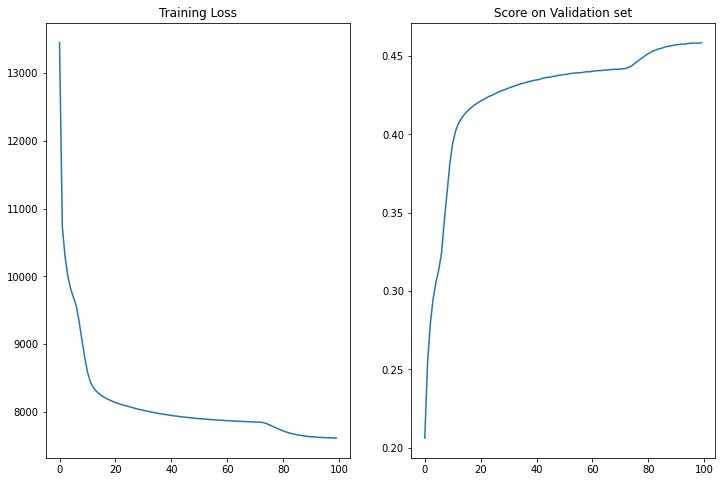

In [ ]:
iter_number = 100
hidden_layer_sizes = [60]
losses_5, test_performance_5, mse_5, loss_5, best_loss_5, loss_curve_5 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 5: mlp.score={test_performance_5[-1]}, mse={mse_5}, loss_={loss_5}, best_loss={best_loss_5}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_5)), losses_5)
ax2.plot(range(len(test_performance_5)), test_performance_5)
plt.show()

# Compare different Models

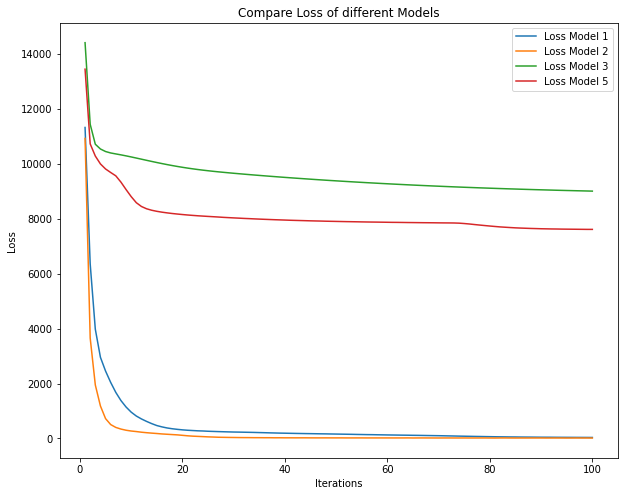

In [ ]:
x = range(1, len(losses_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, losses_1, label = "Loss Model 1")
plt.plot(x, losses_2, label = "Loss Model 2")
plt.plot(x, losses_3, label = "Loss Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, losses_5, label = "Loss Model 5")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Compare Loss of different Models')
plt.legend()
plt.show()

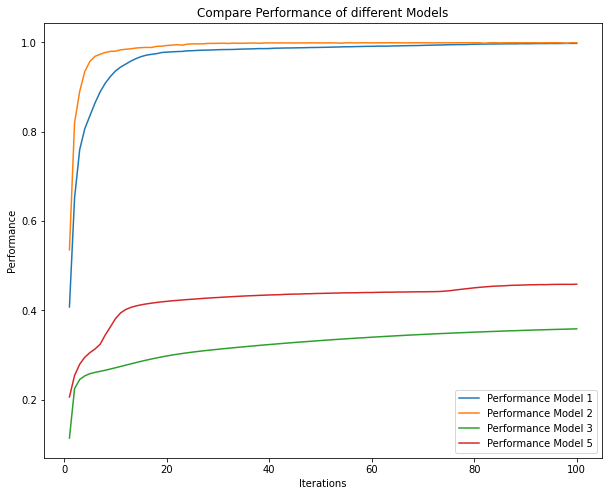

In [ ]:
x = range(1, len(test_performance_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, test_performance_1, label = "Performance Model 1")
plt.plot(x, test_performance_2, label = "Performance Model 2")
plt.plot(x, test_performance_3, label = "Performance Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, test_performance_5, label = "Performance Model 5")
plt.xlabel("Iterations")
plt.ylabel("Performance")
plt.title('Compare Performance of different Models')
plt.legend()
plt.show()